<a href="https://colab.research.google.com/github/kiojoel/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

Heart disease is one of the leading causes of death worldwide, making its early detection crucial for improving patient outcomes. This project aims to develop a predictive model for heart disease using a dataset of patient health metrics. By analyzing various features such as age, sex, chest pain type, cholesterol levels, e.t.c.

Importing the Libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Processing

In [46]:
#Loading the data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

# print the first 5 rows of the data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
# print last 5 rows of the data
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [48]:
# size of the dataset (rows,columns)
heart_data.shape

(1025, 14)

In [49]:
# dataset information
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [50]:
# Statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


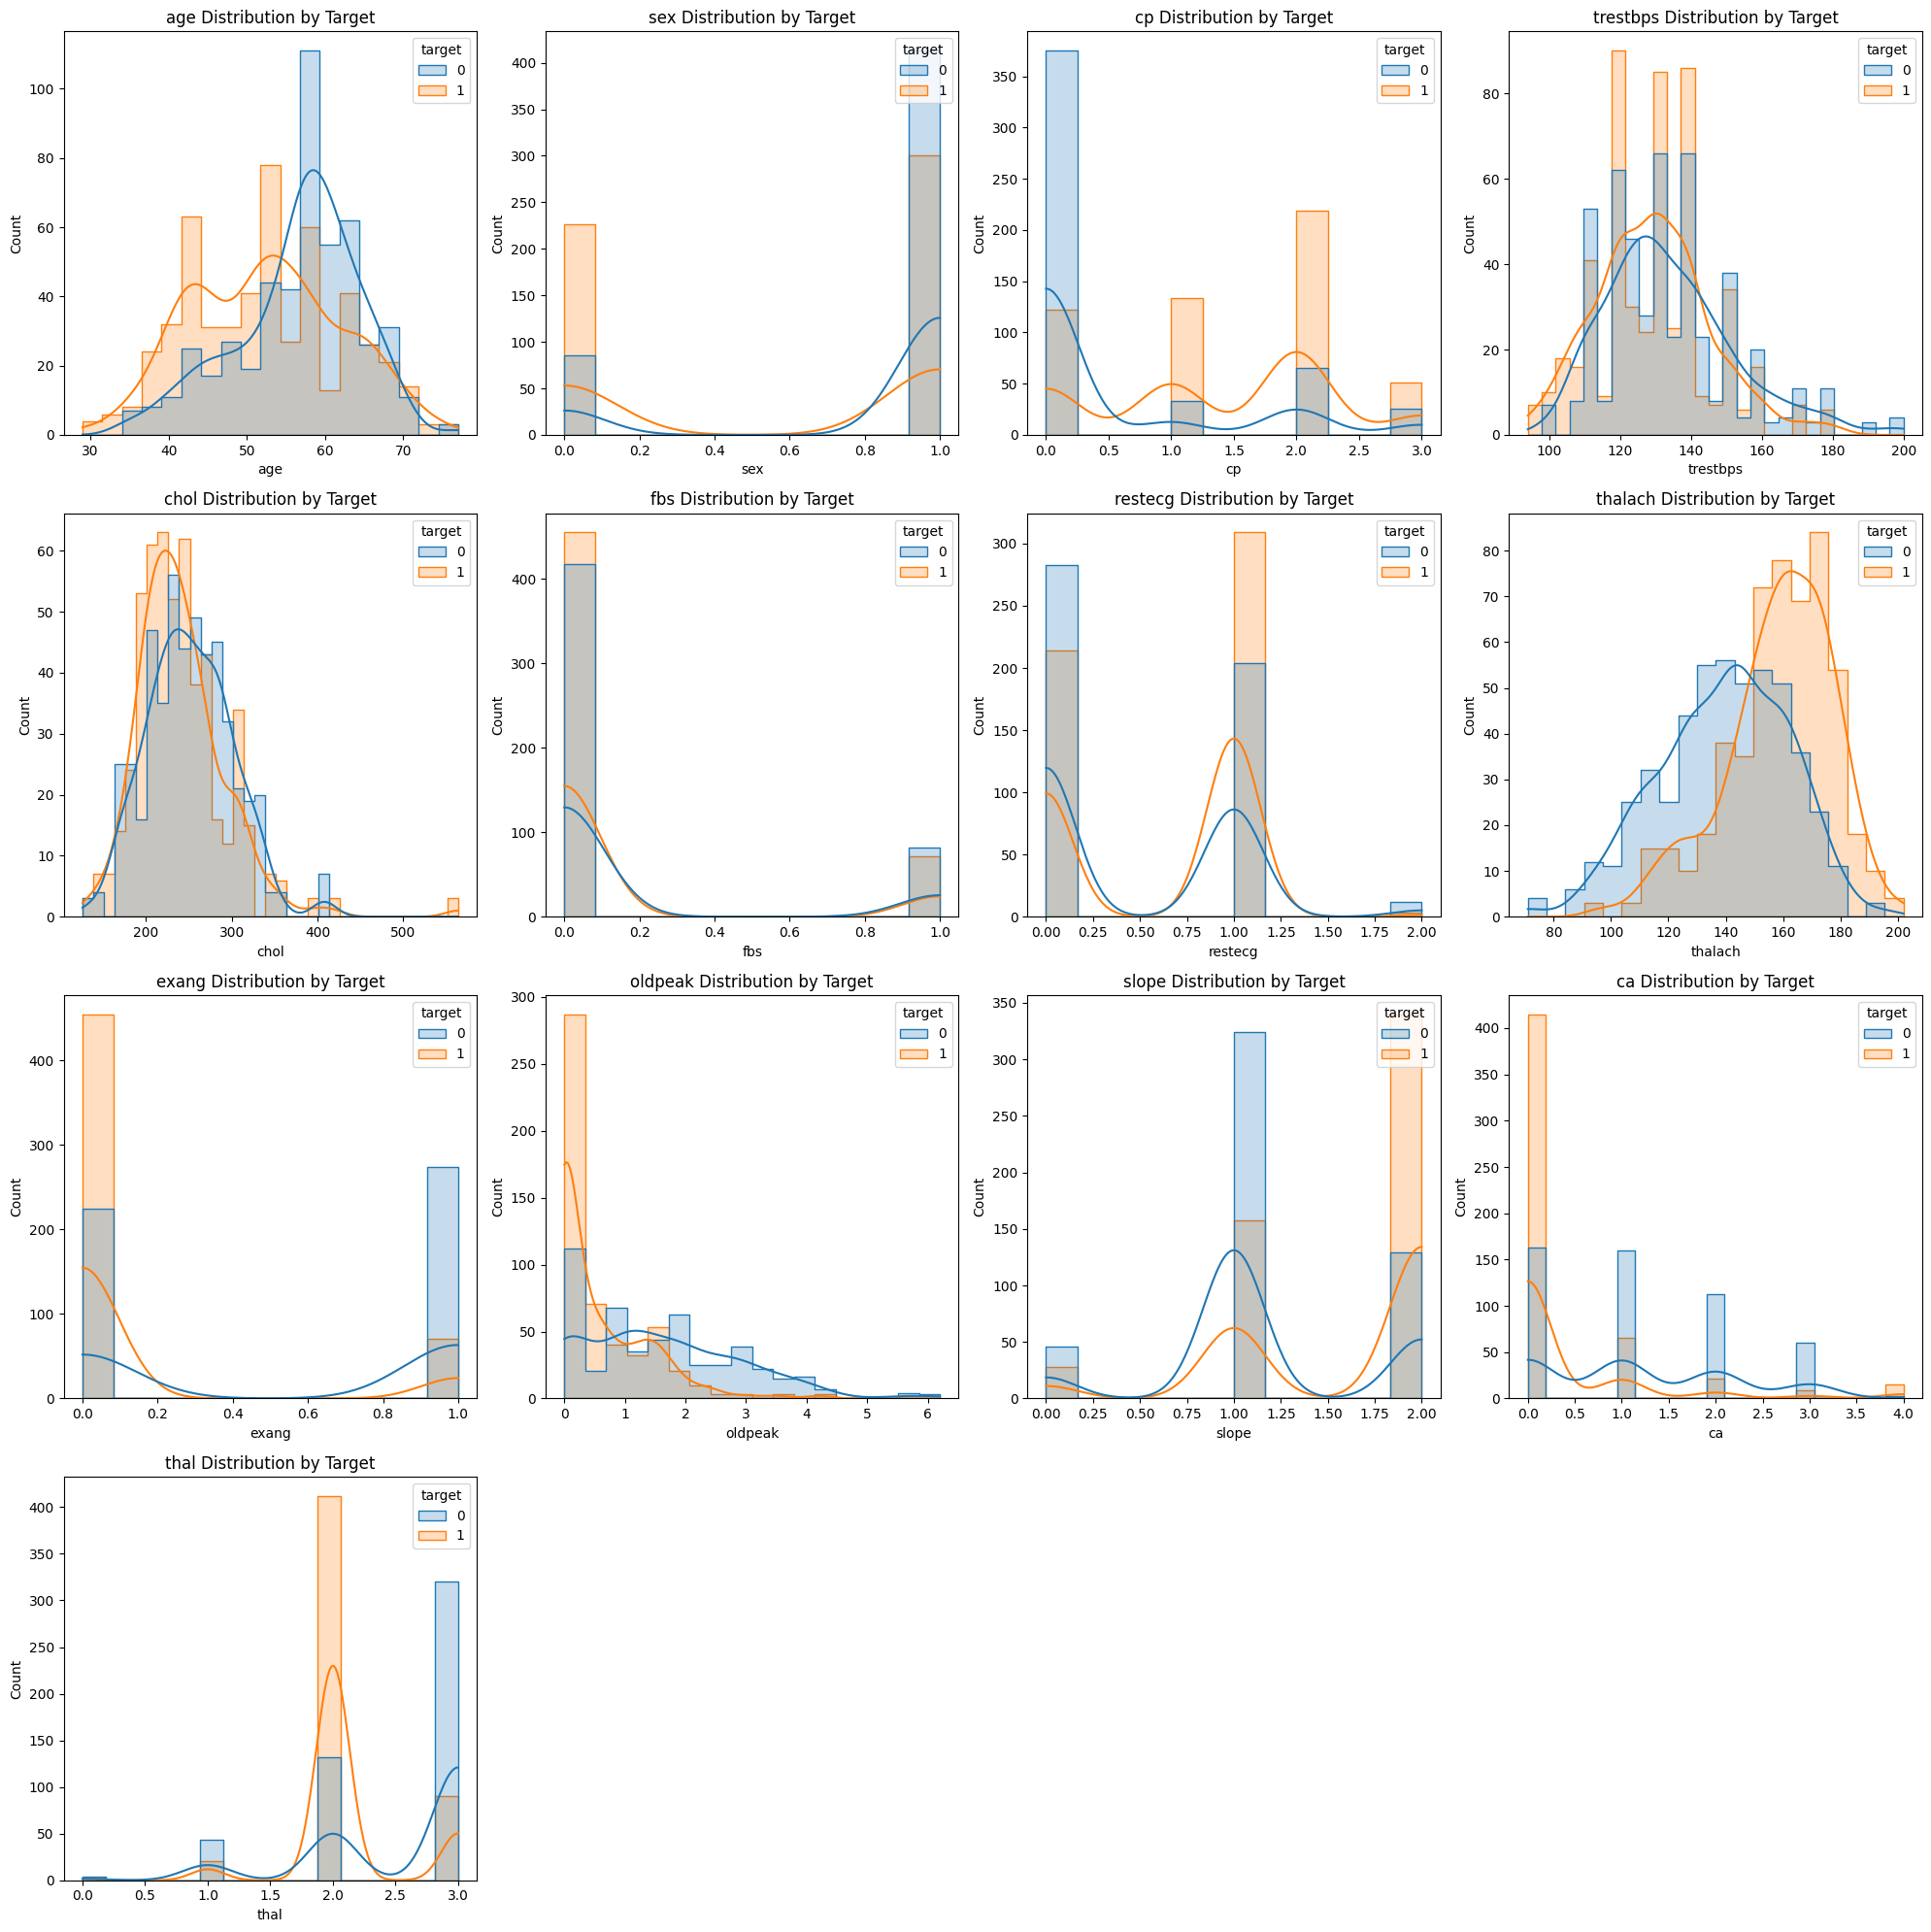

In [51]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 20))

# Plotting distribution for each feature based on the target variable
for i, column in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=heart_data, x=column, hue='target', kde=True, element='step')
    plt.title(f'{column} Distribution by Target')

plt.tight_layout()
plt.show()

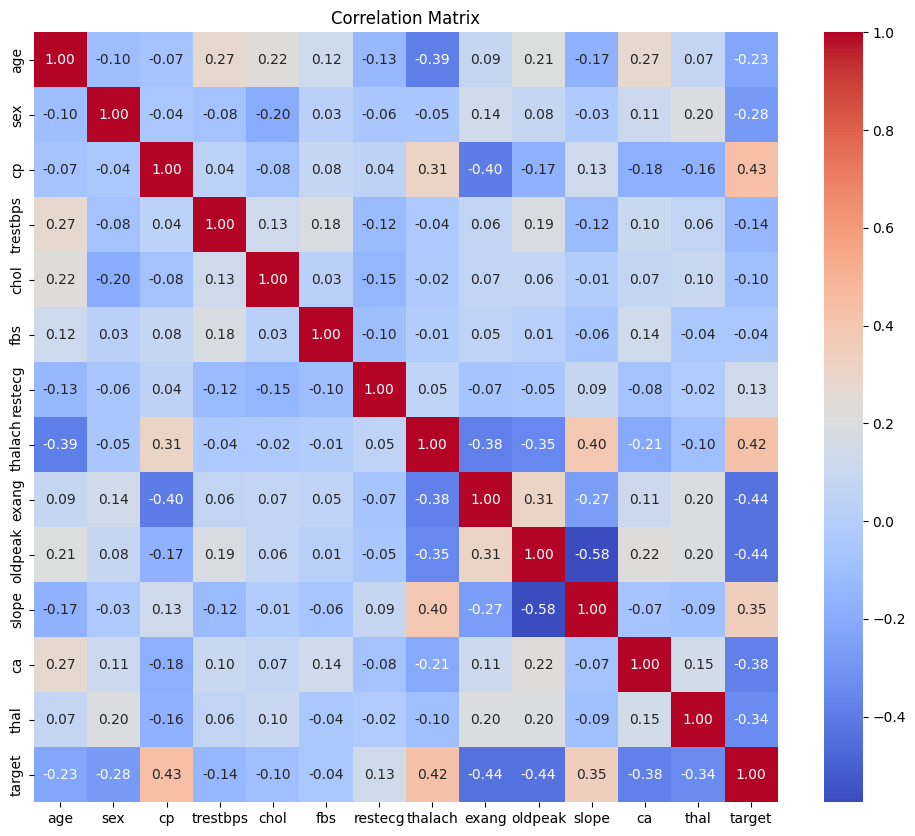

In [52]:
# Correlation matrix
correlation_matrix = heart_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [53]:
# checking for the data distribtion of the target value
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64



*   0 represent Healthy Heart
*   1 represents Defective heart




Splitting data into Features and Target

In [54]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [55]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [56]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training and Test Data

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [58]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(820, 13) (205, 13) (820,) (205,)


Model Training (Logistic Regression)

In [59]:
model = LogisticRegression(max_iter=1000)

In [60]:
# Training the Logistic Regression model with training data
model.fit(X_train.values,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [61]:
# accuracy on training data
x_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(x_train_prediction,Y_train)
print(f'Accuracy on training data : {training_data_accuracy}')

Accuracy on training data : 0.8548780487804878


In [62]:
# accuracy on test data
x_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print(f'Accuracy on test data : {test_data_accuracy}')

Accuracy on test data : 0.8


Making Predictive System

In [63]:
# Prediction with a person with heart disease data

#data_input = np.array([58,1,2,140,211,1,0,165,0,0,2,0,2]).reshape(1,-1)
#data_input = np.array([41,0,1,105,198,0,1,168,0,0,2,1,2]).reshape(1,-1)


# Prediction with a person without heart disease data

data_input = np.array([60,1,0,130,253,0,1,144,1,1.4,2,1,3]).reshape(1,-1)
#data_input = np.array([61,1,0,148,203,0,1,161,0,0,2,1,3]).reshape(1,-1)

# making prediction
prediction = model.predict(data_input)
print(prediction)

if(prediction[0] == 0):
  print('The Person does not have a heart disease')
else:
  print('The Person has a heart disease')

[0]
The Person does not have a heart disease
